In [6]:
import numpy as np 
import pandas as pd
import gurobipy as gp
import numpy.linalg as la 

import matplotlib.pyplot as plt 

from scipy.optimize import minimize, newton

**Consider the optimization function:**

$f(x, y) = 2x^2 + 3y^2 + 𝑥𝑦 + 𝑥$

# Question 1

**Gradient of Function:**

$\nabla f(x,y)=[4x + y + 1, \ 6y+x]$

**Hessian Matrix**

$H(x,y) = \begin{bmatrix} \frac{\partial f^2}{\partial xx} & \frac{\partial f^2}{\partial xy} \\ \frac{\partial f^2}{\partial yx} & \frac{\partial f^2}{\partial yy} \end{bmatrix}=\begin{bmatrix} 4 & 1 \\ 1 & 6 \end{bmatrix}$

# Question 2

In [41]:
# find the eigenvalues of the hessian matrix
H = np.array([[4, 1], [1, 6]])
print(f'Hessian Matrix:\n{H}\n')
print(f'Eigenvalues are {la.eigvals(H)}')
print('Since all eigenvalues are positive, we have that the function is strictly convex ')

Hessian Matrix:
[[4 1]
 [1 6]]

Eigenvalues are [3.58578644 6.41421356]
Since all eigenvalues are positive, we have that the function is strictly convex 


C:\Users\mahar\AppData\Local\Temp/ipykernel_30544/2492840073.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")                # Returns the axes of the figure with the projection label "3d".


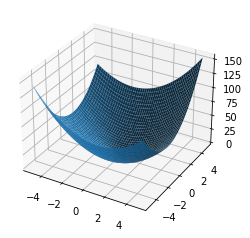

In [15]:
# plotting the function 
def f(x):
    return 2*x[0]**2 + 3*x[1]**2 + x[0]*x[1] + x[0]

# Commands that use axes 3d to plot the initial objective function in 3D
fig = plt.figure()
ax = fig.gca(projection="3d")                # Returns the axes of the figure with the projection label "3d".
xmesh, ymesh = np.mgrid[-5:5:50j, -5:5:50j]  # Returns a meshgrid where all have the same shape. 
                                             # The 'j' indicates that this number is a complex number.
    
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)         # Plot the meshes in a 3D image.
plt.show()

# Question 3

In [16]:
def steepest_descent(gradient, function=None, x0:list=[np.array([1, 1])], 
                     opt_fun:str='min', maxiter:int=1000, t_opt:float = 0.1, 
                     tol:float = 1e-6, dxmin:float = 1e-6, dx:float=float('Inf'), 
                     gnorm:float= float('Inf'), verbose=False) -> tuple:
    """
    Steepest Descent Algorithm (modified from Dr. Kaya for generic application)
    
    Input:
        gradient : Define the gradient of the objective function
        function : Define the base objective function for screen output
        x0       : Store an initial point "x" into it
        opt_fun  : Type of optimization being conducted, either minimization or maximazation
        maxiter  : Maximum number of iterations
        t_opt    : Set fixed step size (default = 0.1)
        tol      : Termination tolerance for minimimum/maximum to be achieved
        dxmin    : Minimum allowed perturbation (i.e. change allowed in the x-variable step)
        dx       : Set dx as a very large number
        gnorm    : The norm distance of the g-adjusted vector
        verbose  : Boolean to output each itteration to the screen
    
    Output:
        x : Current optimal solution     
        g : Gradient of the function at new point
        n : Numbers of iterations
    
    """
    assert opt_fun in ['min', 'max'], 'Optimization function is either min and max'
    
    count = 0 
    
    # Main while loop: stay in this loop, while none of the following three conditions are satisfied:
    # 1) The gradient norm is sufficiently larger than zero (if zero no further gain expected)
    # 2) count is less than the max iteration count; (to prevent forever loop)
    # 3) The change from x to the next point, is sufficiently large (when it gets small then we've reached termination)
    
    while (gnorm >= tol and (count <= maxiter and dx >= dxmin)):
        x = x0[-1]  # Always set x equal to the most recently placed point, given [-1] for Python list
        
        # Dynamic selection criteria offered by user
        if opt_fun == 'min':
            g = -gradient(x)  # For minimization problems, the negative of the gradient is the best improving direction
        else:
            g = gradient(x)
        
        next_point = x + t_opt * g  # Update next point
        x0.append(next_point)       # Append next_point to list of points

        # Update termination conditions
        gnorm = la.norm(-g)           # Compute norm of gradient (euclidean distance) to see direction improvement
        dx = la.norm(next_point - x)  # Compute the norm of the difference between the last point x and the next point
        count = count + 1             # Increment the iteration count
        
        if verbose:
            f_val = function(x)
            print('----------')
            print(f"{count}: The current point is:{x}\n => gradient: {g}\n => function value: {f_val}")
           
    return x, g, count

In [17]:
def gradient(x):
    # Our gradient as defined above is as follows: 4𝑥+𝑦+1, 6𝑦+𝑥
    return np.array([4*x[0]+x[1]+1, 6*x[1]+x[0]])

In [27]:
# initialize our base 
initial_point = np.array([3,3])
step_size = 0.1

# Call our steepest decesent algorithm with additional parameters
x_sol1, g_terminal1, n_count1 = steepest_descent(gradient=gradient, 
                                                 function=f, 
                                                 x0=[initial_point], 
                                                 t_opt=step_size, 
                                                 opt_fun='min', 
                                                 verbose=True)

----------
1: The current point is:[3 3]
 => gradient: [-16 -21]
 => function value: 57
----------
2: The current point is:[1.4 0.9]
 => gradient: [-7.5 -6.8]
 => function value: 9.01
----------
3: The current point is:[0.65 0.22]
 => gradient: [-3.82 -1.97]
 => function value: 1.7831999999999997
----------
4: The current point is:[0.268 0.023]
 => gradient: [-2.095 -0.406]
 => function value: 0.41939899999999997
----------
5: The current point is:[ 0.0585 -0.0176]
 => gradient: [-1.2164  0.0471]
 => function value: 0.06524417999999996
----------
6: The current point is:[-0.06314 -0.01289]
 => gradient: [-0.73455  0.14048]
 => function value: -0.05385434990000002
----------
7: The current point is:[-0.136595  0.001158]
 => gradient: [-0.454778  0.129647]
 => function value: -0.09943276606800001
----------
8: The current point is:[-0.1820728  0.0141227]
 => gradient: [-0.2858315  0.0973366]
 => function value: -0.11774479856701
----------
9: The current point is:[-0.21065595  0.02385636

In [28]:
print(f'Our optimal x-solution is {x_sol1}')
print(f'=> This creates a function value of {f(x_sol1)}')
print(f'=> the algorithm arrived at solution in {n_count1} iterations')

Our optimal x-solution is [-0.26086774  0.0434775 ]
=> This creates a function value of -0.13043478260169186
=> the algorithm arrived at solution in 32 iterations


# Question 4

We implement the deflected gradient descent as the Newton's Method i.e we will apply the Hessian matrix, to add curvature to the steepeest existing descent algorithm. More specifically we will modify our descending vector $x_{k+1}$ by applying the negative inverse of the Hessian matrix (given that we are solving a minimization problem), where our inverse matrix satisifes the following expression. 

$$x_{k+1} = -H^{-1}\nabla f(x_k)$$

All other elements are left the same from our `steepest_descent` function.

In [43]:
# The inverse of the Hessian matrix applied to our gradient step
la.linalg.inv(H)

array([[ 0.26086957, -0.04347826],
       [-0.04347826,  0.17391304]])

In [31]:
def deflected_gradient_descent(gradient, hessian, function=None, x0:list=[np.array([1, 1])], 
                               opt_fun:str='min', maxiter:int=1000, t_opt:float = 0.1, 
                               tol:float = 1e-6, dxmin:float = 1e-6, dx:float=float('Inf'), 
                               gnorm:float= float('Inf'), verbose=False) -> tuple:
    """
    Steepest Descent Algorithm (modified from Dr. Kaya for generic application)
    
    Input:
        gradient : Define the gradient of the objective function
        hessian  : Define the hessian of the objective function
        function : Define the base objective function for screen output
        x0       : Store an initial point "x" into it
        opt_fun  : Type of optimization being conducted, either minimization or maximazation
        maxiter  : Maximum number of iterations
        t_opt    : Set fixed step size (default = 0.1)
        tol      : Termination tolerance for minimimum/maximum to be achieved
        dxmin    : Minimum allowed perturbation (i.e. change allowed in the x-variable step)
        dx       : Set dx as a very large number
        gnorm    : The norm distance of the g-adjusted vector
        verbose  : Boolean to output each itteration to the screen
    
    Output:
        x : Current optimal solution     
        g : Gradient of the function at new point
        n : Numbers of iterations
    
    """
    assert opt_fun in ['min', 'max'], 'Optimization function is either min and max'
    
    count = 0 
    
    # Main while loop: stay in this loop, while none of the following three conditions are satisfied:
    # 1) The gradient norm is sufficiently larger than zero (if zero no further gain expected)
    # 2) count is less than the max iteration count; (to prevent forever loop)
    # 3) The change from x to the next point, is sufficiently large (when it gets small then we've reached termination)
    
    while (gnorm >= tol and (count <= maxiter and dx >= dxmin)):
        x = x0[-1]  # Always set x equal to the most recently placed point, given [-1] for Python list
        
        # Dynamic selection criteria offered by user
        if opt_fun == 'min':
            # Leveraging the Newton's method for gradient descent i.e. Hessian * Gradient (matrix algebra)
            # dot product for a H=2x2, and gradient 2x1 = vector g of 2x1
            g = -np.linalg.inv(hessian).dot(gradient(x))  
        else:
            g = np.linalg.inv(hessian).dot(gradient(x))
        
        next_point = x + t_opt * g  # Update next point
        x0.append(next_point)       # Append next_point to list of points

        # Update termination conditions
        gnorm = la.norm(-g)           # Compute norm of gradient (euclidean distance) to see direction improvement
        dx = la.norm(next_point - x)  # Compute the norm of the difference between the last point x and the next point
        count = count + 1             # Increment the iteration count
        
        if verbose:
            f_val = function(x)
            print('----------')
            print(f"{count}: The current point is:{x}\n => gradient: {g}\n => function value: {f_val}")
           
    return x, g, count

In [44]:
# Call our deflected gradient decesent algorithm with additional parameters
x_sol2, g_terminal2, n_count2 = deflected_gradient_descent(gradient=gradient, 
                                                           hessian=H, 
                                                           function=f, 
                                                           x0=[initial_point], 
                                                           t_opt=1, 
                                                           opt_fun='min', 
                                                           verbose=True)

----------
1: The current point is:[3 3]
 => gradient: [-3.26086957 -2.95652174]
 => function value: 57
----------
2: The current point is:[-0.26086957  0.04347826]
 => gradient: [-1.73774039e-16 -1.93082265e-16]
 => function value: -0.13043478260869565


In [37]:
print(f'Our optimal x-solution is {x_sol2}')
print(f'=> This creates a function value of {f(x_sol2)}')
print(f'=> the algorithm arrived at solution in {n_count2} iterations')

Our optimal x-solution is [-0.26086266  0.04348452]
=> This creates a function value of -0.1304347823522414
=> the algorithm arrived at solution in 125 iterations


# Question 5

Our steepest decesent algorithm relies solely on the gradient of the function, while our deflected gradient method includes the inverse of the Hessian matrix which applies curvature to the direction of desecent (gradient). Additionally, given that the gradient method includes the Hessian matrix, additional computations must be considered, namely the dot product, to produce a vector that moves in the direction of our decision variables $x, y$. By extension, this also made our starting point more important in determining the speed of our convergence, given that the inverse Hessian reduces the speed at which each successive iteration is applied to reach optimiality. In the end, however, they both arrive at roughly the same optimal point. 

# Question 6

Our deflected gradient decesent took more iterations to converge relative to the steepest decesent algorihm, in particular taking 4x more steps.  

In [38]:
print(f'Steepest Decesent converged to the solution in {n_count1} steps')
print(f'Deflected Gradient Decesent converged to the solution in {n_count2} steps')

Steepest Decesent converged to the solution in 32 steps
Deflected Gradient Decesent converged to the solution in 125 steps
